In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
vol_data_norm = pd.read_csv("/content/drive/Shared wtih me/Data_Mining_Project/anom_data/Volcanoes.csv")
nonvol_data_norm = pd.read_csv("/content/drive/Shared wtih me/Data_Mining_Project/anom_data/NonVolcanoes.csv")

FileNotFoundError: ignored

In [ ]:
vol_data_norm = vol_data_norm.drop(columns=[vol_data_norm.columns[0], vol_data_norm.columns[-1]])
nonvol_data_norm = nonvol_data_norm.drop(columns=[nonvol_data_norm.columns[0], nonvol_data_norm.columns[-1]])

In [ ]:
vol_data = vol_data_norm.multiply(255)
nonvol_data = nonvol_data_norm.multiply(255)

In [ ]:
vol_data = vol_data.astype(int)
nonvol_data = nonvol_data.astype(int)

In [ ]:
vol_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,94,101,98,103,94,85,96,88,69,103,...,110,107,92,88,103,98,117,116,118,96
1,81,91,92,88,103,96,92,76,83,94,...,102,91,96,101,91,94,108,108,98,105
2,125,112,94,105,108,117,127,119,114,123,...,107,101,114,121,118,103,123,108,124,121
3,83,97,103,94,69,91,108,99,78,94,...,107,96,91,85,92,99,76,89,92,103
4,105,103,105,109,114,112,97,85,108,108,...,110,112,109,112,112,110,110,105,99,101


In [ ]:
indices = np.random.choice(nonvol_data.shape[0], size=1419, replace=False)
nonvol_data_test = nonvol_data.iloc[indices]

# store the rest of the rows in another variable
nonvol_data_train = nonvol_data.iloc[~np.isin(np.arange(nonvol_data.shape[0]), indices)]
nonvol_data_train.shape

(6608, 12100)

In [ ]:
nonvol_data_test.shape

(1419, 12100)

In [ ]:
vol_data.shape

(1419, 12100)

In [ ]:
from sklearn.decomposition import PCA

n_components = 5

pca = PCA(n_components=n_components).fit(nonvol_data_train)


In [ ]:
def mse(x, x_recon):
    return np.mean(np.subtract(x, x_recon)**2)

In [ ]:
def error(df, df_pca):
  df_pca_recon=pca.inverse_transform(df_pca)
  df_arr = df.values
  mse_error=[]
  for i in range(len(df)):
    mse_error.append(mse(df_arr[i],df_pca_recon[i]))
  plt.hist(mse_error)
  return mse_error

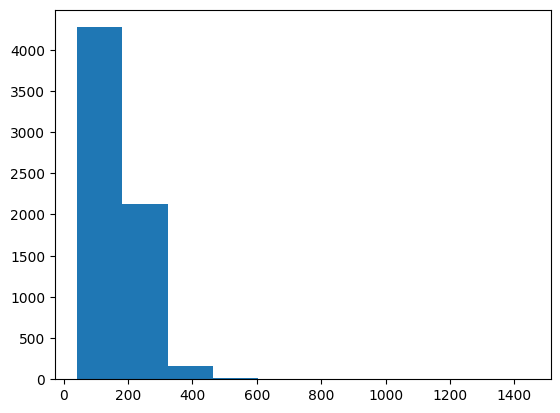

In [ ]:
nonvol_data_train_pca = pca.transform(nonvol_data_train)
nonvol_train_error = error(nonvol_data_train, nonvol_data_train_pca)

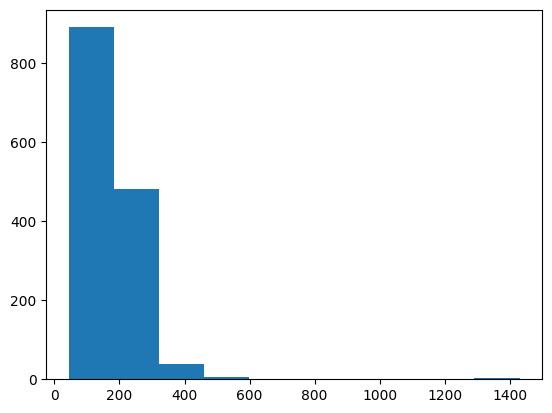

In [ ]:
nonvol_data_test_pca = pca.transform(nonvol_data_test)
nonvol_test_error = error(nonvol_data_test, nonvol_data_test_pca)

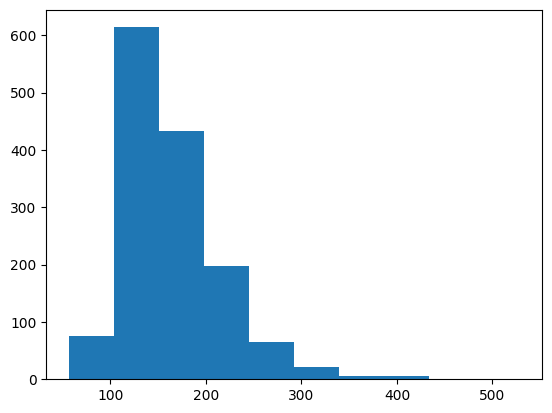

In [ ]:
vol_data_pca = pca.transform(vol_data)
vol_error = error(vol_data, vol_data_pca)

In [ ]:
c=0
for i in nonvol_train_error:
  if i<150:
    c=c+1
print(len(nonvol_train_error), c)

6608 3008


In [ ]:
c=0
for i in nonvol_test_error:
  if i>150:
    c=c+1
print(len(nonvol_test_error), c)

1419 789


In [ ]:
c=0
for i in vol_error:
  if i >150:
    c=c+1
print(len(vol_error), c)

1419 738


In [ ]:
nonvol_data_train_pca = pca.transform(nonvol_data_train)
nonvol_train_error = error(nonvol_data_train, nonvol_data_train_pca)

nonvol_data_test_pca = pca.transform(nonvol_data_test)
nonvol_test_error = error(nonvol_data_test, nonvol_data_test_pca)

vol_data_pca = pca.transform(vol_data)
vol_error = error(vol_data, vol_data_pca)

In [ ]:
def metrics(nonvol_data_train_error, nonvol_data_test_error, vol_data_error, threshold):
  train_err_count = 0
  for i in nonvol_data_train_error:
    if i < threshold:
      train_err_count+=1
  #FP = len(nonvol_data_train_error) - TN
  TN = 0
  for i in nonvol_data_test_error:
    if i > threshold:
      TN+=1
  TP = 0
  for i in vol_data_error:
    if i > threshold:
      TP+=1
  FP = len(nonvol_data_test_error) - TN
  FN = len(vol_data_error) - TP
  return TP, TN, FP, FN, train_err_count

In [ ]:
TP, TN, FP, FN, train_err_count = metrics(nonvol_train_error, nonvol_test_error, vol_error, 150)